<a href="https://colab.research.google.com/github/OsbornOuO/ml_virtual_currency/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finlab_crypto

In [4]:
import finlab_crypto

finlab_crypto.setup()

In [7]:
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT",'4h')

All caught up..!


In [8]:
ohlcv.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,275647.421911,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,261054.051154,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,555419.758061,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,707808.200922,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,878286.968557,8733.911395


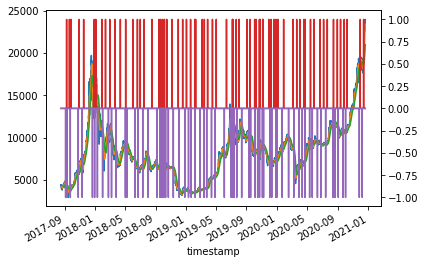

In [22]:
close = ohlcv.close
sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

close.plot()
sma20.plot()
sma60.plot()

entries.astype(int).plot(secondary_y=True)
(-exits.astype(int)).plot(secondary_y=True)

In [25]:
import vectorbt as vbt

portfolio = vbt.Portfolio.from_signals(close,entries,exits,freq='4h')

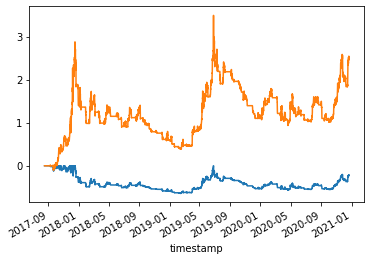

In [31]:
portfolio.annual_returns()

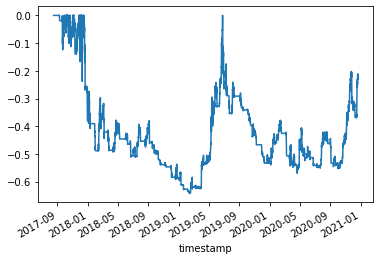

In [32]:
portfolio.drawdown().plot()

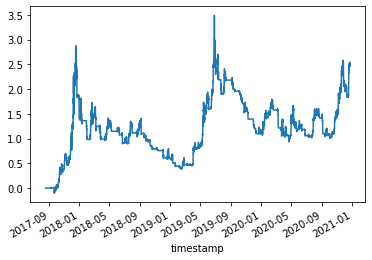

In [33]:
portfolio.cumulative_returns().plot()

In [35]:
portfolio.positions().records

,col,size,entry_idx,entry_price,entry_fees,exit_idx,exit_price,exit_fees,pnl,return,status
0,0,0.023527,136,4246.25201,0.099900,140,4249.44630,0.099975,-0.124724,-0.001247,1
1,0,0.025377,204,3931.69777,0.099776,225,3776.22000,0.095830,-4.141197,-0.041464,1
2,0,0.024191,240,3953.39945,0.095638,417,5684.30001,0.137511,41.639834,0.434953,1
3,0,0.022531,440,6091.08500,0.137237,513,6500.47302,0.146460,8.940119,0.065079,1
4,0,0.019661,547,7434.42700,0.146168,758,14686.23906,0.288745,142.142569,0.971490,1
...,...,...,...,...,...,...,...,...,...,...,...
65,0,0.020733,6643,11630.26865,0.241131,6665,10130.70915,0.210040,-31.541587,-0.130676,1
66,0,0.019838,6720,10566.81626,0.209621,6778,10481.47803,0.207928,-2.110457,-0.010058,1
67,0,0.019241,6809,10785.02425,0.207512,6841,10517.22225,0.202360,-5.562592,-0.026779,1
68,0,0.018515,6873,10907.85696,0.201955,7172,16772.58063,0.310539,108.070877,0.534588,1
